In [883]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv( 'ruter_data.csv' , delimiter=';' )
df.head(13)


,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
5,3110-2020-08-01T16:16:00+02:00,01/08/2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,0,17:22:56,17:23:23,17:16:00,17:16:00,151,8
6,15010-2020-07-28T13:09:00+02:00,28/07/2020,Viken,Vest,Bærum,Nedre Toppenhaug,Øvre Toppenhaug,Lokal,Viken,150,0,13:19:00,13:19:05,13:17:00,13:17:00,112,1
7,15003-2020-07-27T06:18:00+02:00,27/07/2020,Oslo,Indre By,St.Hanshaugen,Hammersborggata (ved Storgata retning vest),St. Olavs plass (mot Frederiks gate),Lokal,Viken,150,1,06:20:24,06:20:29,06:20:00,06:20:00,112,-1
8,21002-2020-08-16T14:33:00+02:00,16/08/2020,Viken,Vest,Bærum,Stein gård,Knabberudveien,Lokal,Viken,150,1,15:10:12,15:10:34,15:09:00,15:09:00,112,2
9,15002-2020-08-13T18:09:00+02:00,13/08/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,18:37:41,18:38:19,18:29:00,18:29:00,112,4


### How late is the bus?




In [884]:
#some of the values times goes over the standard 00-23 mark:
F = 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'
P = 'Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'

for i, r in df.iterrows():

    if r[F].startswith('24'):
        
        New_line_F = '00' + r[F][2:]
        df.loc[i, F] = str(New_line_F)
        
    elif r[F].startswith('25'):
        New_line_F_2 = '01' + r[F][2:]
        df.loc[i, F] = str(New_line_F_2)
        
    else:
        pass

for i, r in df.iterrows():
    
    if r[P].startswith('24'):
        New_line_P = '00' + r[P][2:]
        df.loc[i, P] = str(New_line_P)
    
    elif r[P].startswith('25'):
        
        New_line_P_2 = '01' + r[P][2:]
        df.loc[i, P] = str(New_line_P_2)
    
    else:
        pass



In [886]:
#some of the lines does not contain a date, just a simple :
for i, r in df.iterrows():
    if len(r[F]) < 7: 
    
        df = df.drop(i)

    else:
        pass


In [887]:
#Now i can convert to datetime and figure out hvw late the bus are on avarage and in total

df[F] = pd.to_datetime(df[F], format = '%H:%M:%S')
df[P] = pd.to_datetime(df[P], format = '%H:%M:%S')

difference = df[P] - df[F]
diff_min = difference.dt.total_seconds() / 60

df['Off_Target'] = diff_min
OT='Off_Target'

#i need to remove some values as i dont want outliers like that.
for i, r in df.iterrows():
    if abs(df[OT][i]) > 100:
        df = df.drop(i)
    else:
        pass
print(df[OT].sort_values(ascending = False ).head(10))

2379    43.083333
3269    42.050000
2255    42.033333
3941    41.316667
187     40.300000
2377    39.716667
2148    36.650000
766     36.250000
5685    26.283333
4174    25.916667
Name: Off_Target, dtype: float64


#### Some of the Linjenavn apears just a few times and the avarage would be unnessesary to compute

In [888]:
LP=df.groupby(['Linjenavn'])
df['Count'] = 1
BL = []
for name, group in LP:
    if group['Count'].count() < 10:
        BL.append(name)
    else:
        pass
        
BL = np.array(BL)         

for index in range(len(BL)):
    bad_line = BL[index]
    for i , r in df.iterrows():
        if r['Linjenavn']==bad_line:
            df = df.drop(i)
        else:
            pass
        
#this code runs for a while

In [889]:
print('Gjennomsnittsforsinkelsen:', df[OT].mean())
print('Medianforsinkelsen: ',df[OT].median())


Gjennomsnittsforsinkelsen: -1.4811543810848402
Medianforsinkelsen:  -1.4166666666666667


### What weekday is the bus late?

In [890]:
df['Dato'] = pd.to_datetime(df['Dato'])
df['Weekday'] = df['Dato'].dt.dayofweek

Weekday_grp = df.groupby(['Weekday'])

print(Weekday_grp[OT].mean(), Weekday_grp[OT].median())

#The bus arrives later on avarage on Tuesday than any other day, and the bus is on time more often on Saturdays

Weekday
0   -1.333502
1   -1.644377
2   -1.407037
3   -1.871134
4   -1.714049
5   -0.909769
6   -1.251576
Name: Off_Target, dtype: float64 Weekday
0   -1.333333
1   -1.483333
2   -1.366667
3   -1.600000
4   -1.508333
5   -1.283333
6   -1.350000
Name: Off_Target, dtype: float64


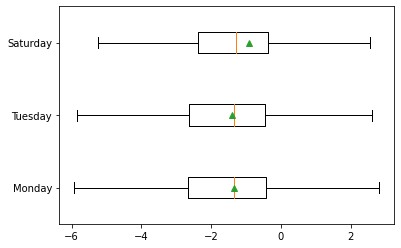

In [891]:
#Now i want to make a visual representation of the lateness each day
Monday = df[df['Weekday']==0]
Tuesday = df[df['Weekday']==3]
Saturday = df[df['Weekday']==5]
labels = ['Monday', 'Tuesday', 'Saturday']

plt.boxplot([Monday[OF], Wednesday[OF], Saturday[OF]], labels = labels, vert=False, showfliers=False, showmeans=True)
plt.xlabel='Minutes Off Target'
plt.show()

### Which bus is the latest?

In [892]:

Linjenavn_grp = df.groupby(['Linjenavn'])
Linjenavn_mean = Linjenavn_grp[OT].mean()
Linjenavn_median = Linjenavn_grp[OT].median()
print(Linjenavn_mean.sort_values(), Linjenavn_median.sort_values())


Linjenavn
470E    -5.763636
490E    -4.825833
34      -4.182759
375     -3.793590
300     -3.702719
          ...    
110E    -0.128070
365      0.517273
60       1.287798
400      8.686310
400E    19.433333
Name: Off_Target, Length: 76, dtype: float64 Linjenavn
300     -3.066667
490     -2.766667
34      -2.583333
370A    -2.200000
480     -2.108333
          ...    
91      -0.375000
110E    -0.350000
365     -0.116667
60      -0.050000
400E    18.133333
Name: Off_Target, Length: 76, dtype: float64


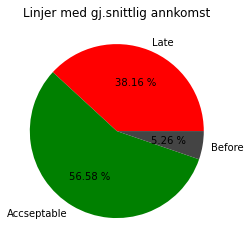

In [893]:
# I would consider the bus late if it arrives 2 minutes later than expected. WHat proportion of the busses are late?
late = []
accseptable = []
before = []
for name, group in Linjenavn_mean.iteritems():
    if group < -2:
        late.append(name)
    elif -2 < group < 0:
        accseptable.append(name)
    else:
        before.append(name)
late = np.array(late)
accseptable = np.array(accseptable)
before = np.array(before)
#print(late.size, accseptable.size, before.size )
colors = ['r', 'g', '#444444']
labels = ['Late', 'Accseptable', 'Before']
plt.pie([late.size, accseptable.size, before.size], labels = labels, colors=colors, autopct = '%.2f %%' )
plt.title('Linjer med gj.snittlig annkomst')
plt.show()

### Can the buss drivers catch up some time at the busstops?

In [894]:

#some of the values times goes over the standard 00-23 mark:
F_Avgang = 'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'
P_Avgang = 'Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'

for i, r in df.iterrows():

    if r[F_Avgang].startswith('24'):
        
        New_line_F_Avgang = '00' + r[F_Avgang][2:]
        df.loc[i, F_Avgang] = str(New_line_F_Avgang)
        
    elif r[F_Avgang].startswith('25'):
        New_line_F_2_Avgang = '01' + r[F_Avgang][2:]
        df.loc[i, F_Avgang] = str(New_line_F_2_Avgang)
        
    else:
        pass

for i, r in df.iterrows():
    
    if r[P_Avgang].startswith('24'):
        New_line_P_Avgang = '00' + r[P_Avgang][2:]
        df.loc[i, P_Avgang] = str(New_line_P_Avgang)
    
    elif r[P_Avgang].startswith('25'):
        
        New_line_P_2_Avgang = '01' + r[P_Avgang][2:]
        df.loc[i, P_Avgang] = str(New_line_P_2_Avgang)
    
    else:
        pass


In [895]:
for i, r in df.iterrows():
    if len(r[F_Avgang]) < 7: 
        df = df.drop(i)

    else:
        pass
for i, r in df.iterrows():
    if len(r[P_Avgang]) < 7: 
        df = df.drop(i)

    else:
        pass

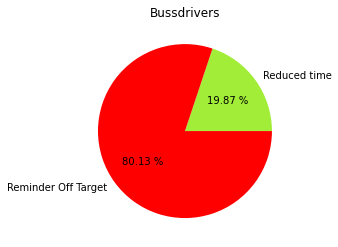

In [896]:
df[F_Avgang] = pd.to_datetime(df[F_Avgang], format = '%H:%M:%S')
df[P_Avgang] = pd.to_datetime(df[P_Avgang], format = '%H:%M:%S')

difference_Avgang = df[P_Avgang] - df[F_Avgang]

diff_min_Avgang = difference_Avgang.dt.total_seconds() / 60

df['Off_Target_Avgang'] = diff_min_Avgang
OTA='Off_Target_Avgang'

df['Efficiency'] = df[OT] - df[OTA]
E = 'Efficiency'

#off target er den totale forsinkelsen 
#off target avgang er hvor forsinket den er på stoppet
#efficiency er hvor mye busssjåføren klarer å hente inn på stoppet

colors = ['#a1ed37', 'r']
labels = ['Reduced time', 'Reminder Off Target']
plt.pie([abs(df[E].mean()), abs(df[OFA].mean())], labels = labels, colors=colors, autopct = '%.2f %%'  )
plt.title('Bussdrivers')
plt.show()

### I want to see if the bus is later on avarage in some places?


In [897]:
Kommune_grp = df.groupby('Kommune')

Kommune_mean_Late = Kommune_grp[OF].mean()
Kommune_mean_E = Kommune_grp[E].mean()
print(Kommune_mean_Late.sort_values(ascending=True), Kommune_mean_E.sort_values(ascending=False))


Kommune
Lier                -4.544444
Indre Østfold       -4.355556
Frogner             -3.578161
Nordre Aker         -3.566667
Nordmarka           -2.948611
Ullern              -2.909438
St.Hanshaugen       -2.846377
Aurskog-Høland      -2.700000
Nordre Follo        -2.166667
Asker               -2.114147
Lørenskog           -2.064627
Søndre Nordstrand   -2.022222
Alna                -1.920853
Nordstrand          -1.881783
Grorud              -1.876096
Stovner             -1.807317
Nittedal            -1.804845
Bærum               -1.780611
Ullensaker          -1.743732
Vestre Aker         -1.729752
Eidsvoll            -1.633468
Grünerløkka         -1.510340
Enebakk             -1.446644
Hurdal              -1.440909
Rælingen            -1.404870
Lillestrøm          -1.196211
Nes                 -1.152833
Bjerke              -1.121044
Gamle Oslo          -0.976247
Sagene              -0.804878
Nannestad           -0.774926
Sentrum             -0.155856
Drammen              0.155556
Gj

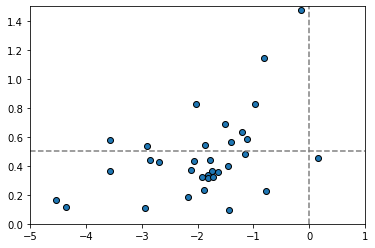

More efficient bussdrivers arrive more often on time


In [898]:
plt.scatter(Kommune_mean_Late, Kommune_mean_E, edgecolor = 'k')
plt.axvline(0, c= (.5, .5, .5), ls = '--')
plt.axhline(0.5, c= (.5, .5, .5), ls = '--' )
plt.xlim(-5, 1)
plt.ylim(0, 1.5)
plt.show()
print('More efficient bussdrivers arrive more often on time')